## Kaggle competition :  Facebook Recruiting IV: Human or Robot?
https://www.kaggle.com/c/facebook-recruiting-iv-human-or-bot/data

### Questions: 

- Predict which user is human or robot by the backend data 

### Hypotheses:

- Robot tend to make more bids than human averagely/totally 
- The time intervals between 2 bids are much periodically for robot than human 
- Robot may use similar IP/platform  for bidding
- Robot may be much possible to make the "first" bid or the "last" bid for a specific auction 

### Procedure: 

1. quick overview of data 
2. Based on hypotheses doing feature engineering 
3. Extract the features then approach the ML model 

### Summary: 

- With features "total_number_bid_bidder_made", and "ave_gap_of_time_in_2_bids", we got 
  average prediction accuracy 0.93  in KNN and 0.94 in random forest
  
- Can use local DB like SQLite or parallel computing ways to speed up the data merge process

In [1]:
# import modules 
import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn 


Populating the interactive namespace from numpy and matplotlib


/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Getting data

In [2]:
df_bids = pd.read_csv('~/Desktop/Facebook _4_robot/bids.csv')
df_bids.info()
df_bids.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
bid_id         int64
bidder_id      object
auction        object
merchandise    object
device         object
time           int64
country        object
ip             object
url            object
dtypes: int64(2), object(7)
memory usage: 584.1+ MB


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [3]:
df_bids

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,phone2,9759243210526315,th,152.235.155.159,j9nl1xmo6fqhcc6
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,phone8,9759243210526315,id,3.210.112.183,hnt6hu93a3z1cpc
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,phone9,9759243210526315,th,103.64.157.225,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3


In [3]:
df_train = pd.read_csv('~/Desktop/Facebook _4_robot/train.csv')
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2012
Data columns (total 4 columns):
bidder_id          2013 non-null object
payment_account    2013 non-null object
address            2013 non-null object
outcome            2013 non-null float64
dtypes: float64(1), object(3)
memory usage: 78.6+ KB


,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0


In [4]:
df_test = pd.read_csv('~/Desktop/Facebook _4_robot/test.csv')
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4700 entries, 0 to 4699
Data columns (total 3 columns):
bidder_id          4700 non-null object
payment_account    4700 non-null object
address            4700 non-null object
dtypes: object(3)
memory usage: 146.9+ KB


,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


In [5]:
# merge df_train and df_bids for data completion 
# merge df_test and df_bids for data completion 

train_merge = pd.merge(df_train, df_bids , how = 'left', on =['bidder_id'])
df_submission = pd.read_csv('~/Desktop/Facebook _4_robot/sampleSubmission.csv')
test_merge = pd.merge(df_test, df_bids , how = 'left', on =['bidder_id'])
test_merge = pd.merge(test_merge, df_submission , how = 'left', on =['bidder_id'])
#train_merge = pd.merge(df_bids, df_train , how = 'inner', on =['bidder_id'])
#table = pd.pivot_table(train_merge, index = ['bidder_id', 'time'], aggfunc = np.size)

In [6]:
train_merge.head()

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,85371,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3
1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,274487,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3
2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,527436,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3
3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,554135,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3
4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,607628,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3


In [7]:
test_merge.head()

,bidder_id,payment_account,address,bid_id,auction,merchandise,device,time,country,ip,url,prediction
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,2714053,cl3cf,home goods,phone169,9.633127e+15,us,128.59.117.159,8ohccaw6fhyc1gy,0
1,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,3785632,edggv,home goods,phone65,9.638908e+15,cn,254.171.78.220,vasstdc27m7nks3,0
2,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,5788255,jqx39,home goods,phone65,9.698805e+15,in,102.115.72.52,jezzg7twk0rqfuw,0
3,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,6575051,jqx39,home goods,phone65,9.703350e+15,cn,210.90.145.131,vasstdc27m7nks3,0
4,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,2536026,h2nr3,sporting goods,phone640,9.632413e+15,az,85.169.46.232,vasstdc27m7nks3,0


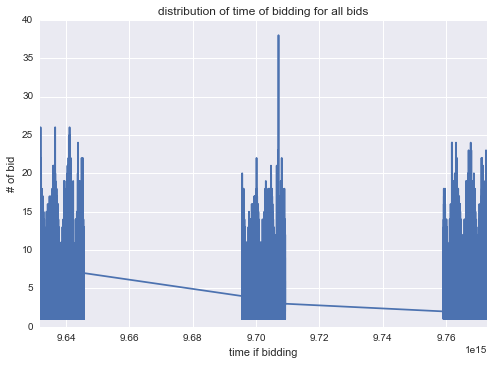

In [8]:
# distribution of time of bidding for all bids  
(train_merge.groupby('time').count())['bid_id'].plot(title='distribution of time of bidding for all bids')
pyplot.xlabel('time if bidding')
pyplot.ylabel('# of bid')


From the chart above, we can assume the data from 3 different days, and can do further trarsformaion for the "time" column  

In [9]:
# Total number of total bids robot & human made 


## Feature Engineering

In [17]:
# import ML modules


from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression, LinearRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve, auc

In [5]:
# define modules for feature preparation

def total_number_bid_bidder_made(data):
	total_number_bid_bidder = data.groupby('bidder_id').count()['payment_account']
	total_number_bid_bidder = pd.DataFrame(total_number_bid_bidder).reset_index()
	total_number_bid_bidder.columns =['bidder_id', 'total_number_bid_bidder_made']
	return total_number_bid_bidder

def avg_number_bid_bidder_made(data):
	avg_number_bid_bidder = (data.groupby(['bidder_id']).count()['outcome'])/(((data.groupby(['bidder_id', 'auction']).count()['outcome'].reset_index()).groupby('bidder_id').count()['outcome']))
	avg_number_bid_bidder = pd.DataFrame(avg_number_bid_bidder).reset_index()
	avg_number_bid_bidder.columns =['bidder_id', 'avg_number_bid_bidder_made']
	return avg_number_bid_bidder

def ave_gap_of_time_in_2_bids(data):
	ave_gap_of_time = [[] for i in range(2)]
	for k in list(set(data.bidder_id)):
		data_k = data[data['bidder_id'] == k]
		if max(data_k['time']) and min(data_k['time']) : 
			ave_gap_of_time[0].append(k)
			ave_gap_of_time[1].append(float(max(data_k['time'])) - float(min(data_k['time'])))
			df = pd.DataFrame(ave_gap_of_time).transpose()
			df.columns = ['bidder_id','gap_time_max_min']
	return df 


In [ ]:
# feature Engineering

def feature_engineering(data):
	df_feature = data[['bidder_id','outcome']]
	df_feature = df_feature.drop_duplicates()
	df_feature = pd.merge(df_feature , total_number_bid_bidder_made(data), how = 'left', on=['bidder_id'])
	df_feature = pd.merge(df_feature , avg_number_bid_bidder_made(data), how = 'left', on=['bidder_id'])
	df_feature = pd.merge(df_feature , ave_gap_of_time_in_2_bids(data), how = 'left', on=['bidder_id'])
	return df_feature


In [ ]:
# do the feature engineering then save them to .csv for avoiding the memory & time cost problems 

# df_train_feature
df_train_feature = feature_engineering(train_merge)
df_train_feature.dropna()
X_train = df_train_feature[['total_number_bid_bidder_made','avg_number_bid_bidder_made','gap_time_max_min']]
y_train = df_train_feature['outcome']


#  df_test_feature
df_submission = pd.read_csv('~/Desktop/Facebook _4_robot/sampleSubmission.csv')
test_feature = pd.merge(test_merge,df_submission , how = 'left', on =['bidder_id'])
test_feature.rename(columns={'prediction_x':'outcome'}, inplace=True)
df_test_feature= feature_engineering(test_feature)
df_test_feature.dropna()
X_test = df_test_feature[['total_number_bid_bidder_made','avg_number_bid_bidder_made','gap_time_max_min']]
y_test = df_test_feature['outcome']


# save outcome to .csv 
df_train_feature.to_csv('~/Desktop/Facebook _4_robot/df_train_feature.csv')
df_test_feature.to_csv('~/Desktop/Facebook _4_robot/df_test_feature.csv')

#  Loading data 

In [6]:
# load the train and test data 
df_train_feature = pd.read_csv('~/Desktop/Facebook _4_robot/df_train_feature.csv')
df_test_feature =pd.read_csv('~/Desktop/Facebook _4_robot/df_test_feature.csv')                           

In [7]:
df_train_feature.head()


,Unnamed: 0,bidder_id,outcome,total_number_bid_bidder_made,avg_number_bid_bidder_made,gap_time_max_min
0,0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0,24,1.333333,1.313558e+13
1,1,624f258b49e77713fc34034560f93fb3hu3jo,0,3,3.000000,6.467158e+12
2,2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0,4,1.000000,7.137000e+12
3,3,4bee9aba2abda51bf43d639013d6efe12iycd,0,1,1.000000,0.000000e+00
4,4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0,155,6.739130,1.197795e+13


In [8]:
df_train_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2012
Data columns (total 6 columns):
Unnamed: 0                      2013 non-null int64
bidder_id                       2013 non-null object
outcome                         2013 non-null float64
total_number_bid_bidder_made    2013 non-null int64
avg_number_bid_bidder_made      1984 non-null float64
gap_time_max_min                1984 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 110.1+ KB


In [9]:
df_test_feature.head()

,Unnamed: 0,bidder_id,outcome,total_number_bid_bidder_made,avg_number_bid_bidder_made,gap_time_max_min
0,0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,0,4,1.333333,7.022368e+13
1,1,a921612b85a1494456e74c09393ccb65ylp4y,0,3,1.500000,7.600205e+13
2,2,6b601e72a4d264dab9ace9d7b229b47479v6i,0,17,1.214286,2.910526e+11
3,3,eaf0ed0afc9689779417274b4791726cn5udi,0,148,1.644444,7.652163e+13
4,4,cdecd8d02ed8c6037e38042c7745f688mx5sf,0,23,1.150000,6.574789e+12


In [10]:
df_test_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4700 entries, 0 to 4699
Data columns (total 6 columns):
Unnamed: 0                      4700 non-null int64
bidder_id                       4700 non-null object
outcome                         4700 non-null int64
total_number_bid_bidder_made    4700 non-null int64
avg_number_bid_bidder_made      4630 non-null float64
gap_time_max_min                4630 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 257.0+ KB


# MACHINE LEARNING 

In [11]:
# split the train data to "train" & "test" data 
df_train_feature = df_train_feature.dropna()
df_test_feature = df_test_feature.dropna()
X = df_train_feature[['total_number_bid_bidder_made','avg_number_bid_bidder_made','gap_time_max_min']]
y = df_train_feature['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, random_state=33)

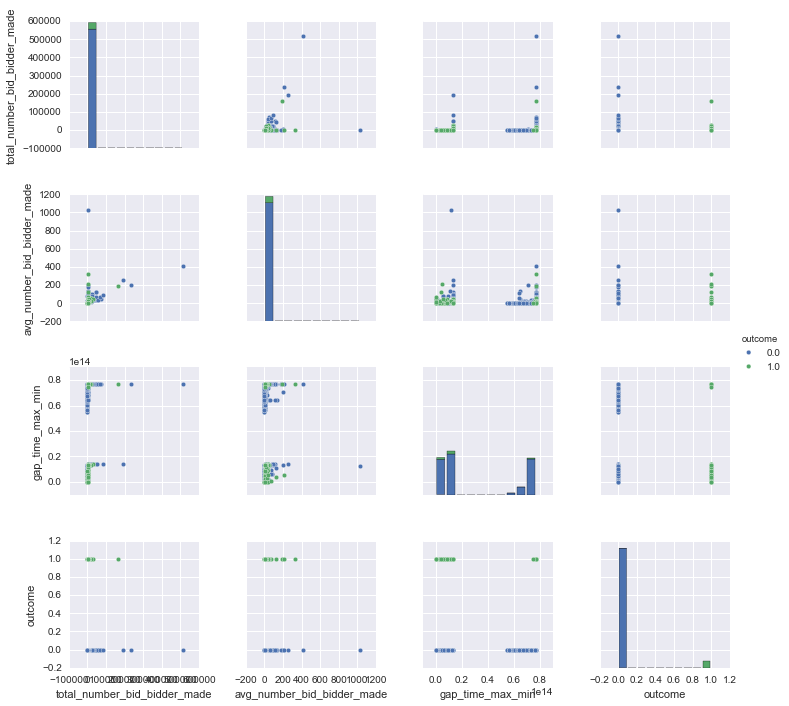

In [12]:
# do the pairplot for train data to check the correlation between features and outcome

data_plot =  df_train_feature[['total_number_bid_bidder_made','avg_number_bid_bidder_made', 'gap_time_max_min','outcome']]
plt.figure()
seaborn.pairplot(data_plot,hue="outcome", dropna=True) 


## KNN

In [13]:
### KNN (k-Nearest Neighbors algorithm) ###

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit( X_train, y_train)
scores_1 = cross_val_score(knn, X_train, y_train, cv=10)
scores_2 = cross_val_score(knn, df_test_feature[['outcome']], knn.predict(df_test_feature[['total_number_bid_bidder_made','avg_number_bid_bidder_made','gap_time_max_min']]),cv=10)
print (scores_1)
print (scores_2)


[ 0.9375      0.94339623  0.94339623  0.94339623  0.94339623  0.94339623
  0.94303797  0.94303797  0.94303797  0.94303797]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


ROC AUC: 0.65


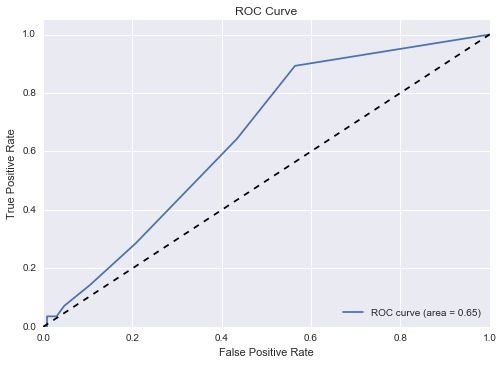

In [18]:
# ROC curve
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
knn.fit(X_train, y_train)

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

[0.89916572453315669, 0.93950945939172514, 0.93509303452385584, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94328820374588573, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967, 0.94265887712536967]


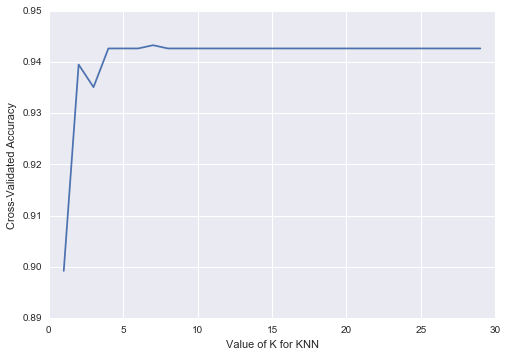

In [14]:
### KNN 2 ###

k_range = range(1,30)
k_scores = []
for k in k_range:

	
	
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit( X_train, y_train)
	scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
	k_scores.append(scores.mean())

print (k_scores) 

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## random forest

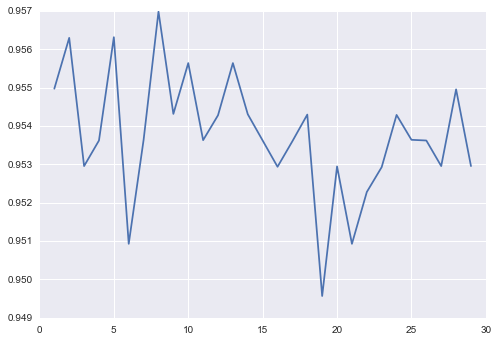

In [20]:
###  random forest  ###
R_range = range(1,30)
R_scores = []
for R in R_range:

    RDF = RF(n_estimators=k)
    scores = cross_val_score(RDF, X_train, y_train, cv=10, scoring='accuracy')
    R_scores.append(scores.mean())
plot(R_range, R_scores)

ROC AUC: 0.90


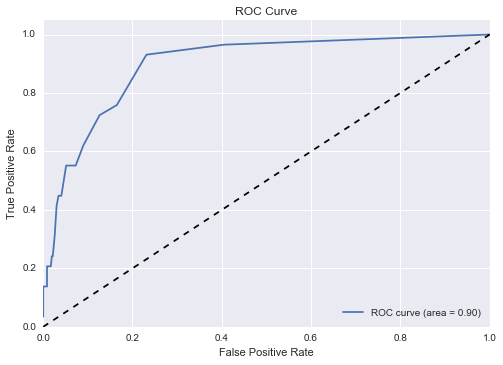

In [19]:
# ROC curve
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
RDF.fit(X_train, y_train)

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, RDF.predict_proba(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## SVM 

In [16]:
# SVM

lin_clf = svm.LinearSVC(class_weight='auto')
lin_clf.fit(X_train, y_train)
lin_clf.predict(X_test)
#lin_clf.score(y_test,lin_clf.predict(X_test) )
scores = cross_val_score(lin_clf, X_train, y_train, cv=40, scoring='accuracy')
scores

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto'

array([ 0.90243902,  0.82926829,  0.92682927,  0.92682927,  0.56097561,
        0.36585366,  0.6097561 ,  0.92682927,  0.43902439,  0.65853659,
        0.26829268,  0.825     ,  0.875     ,  0.75      ,  0.55      ,
        0.375     ,  0.84615385,  0.94871795,  0.94871795,  0.79487179,
        0.48717949,  0.35897436,  0.94871795,  0.43589744,  0.8974359 ,
        0.84615385,  0.94871795,  0.23076923,  0.82051282,  0.53846154,
        0.8974359 ,  0.94871795,  0.66666667,  0.82051282,  0.94871795,
        0.84615385,  0.43589744,  0.74358974,  0.61538462,  0.66666667])